In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore') 

In [8]:
df = pd.read_csv('placement.csv')

In [9]:
df.shape

(1000, 3)

In [10]:
df.sample(5)

,cgpa,placement_exam_marks,placed
865,6.77,16.0,0
763,7.16,59.0,1
869,5.51,58.0,1
721,6.98,11.0,0
361,6.37,37.0,1


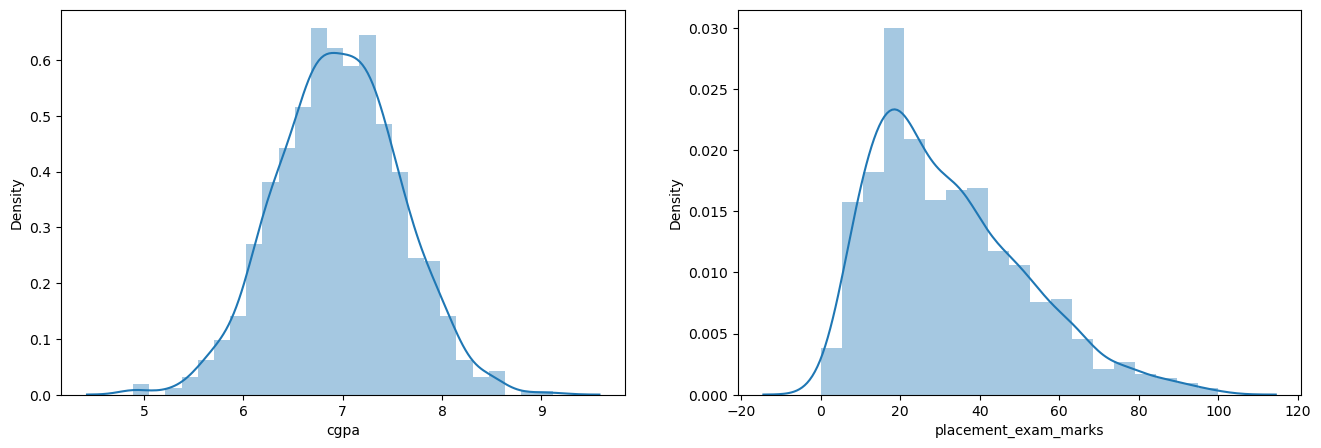

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [16]:
df['cgpa'].skew()

-0.014529938929314918

In [17]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [18]:
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [19]:
outlier = df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)]
outlier

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [20]:
new_df = df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]
new_df.shape

(995, 3)

In [21]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [22]:
outlier = df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]
outlier

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [23]:
new_df1 = df[(df['cgpa_zscore'] < 3 ) & (df['cgpa_zscore'] > -3)]
new_df1.shape

(995, 4)

<AxesSubplot:xlabel='cgpa'>

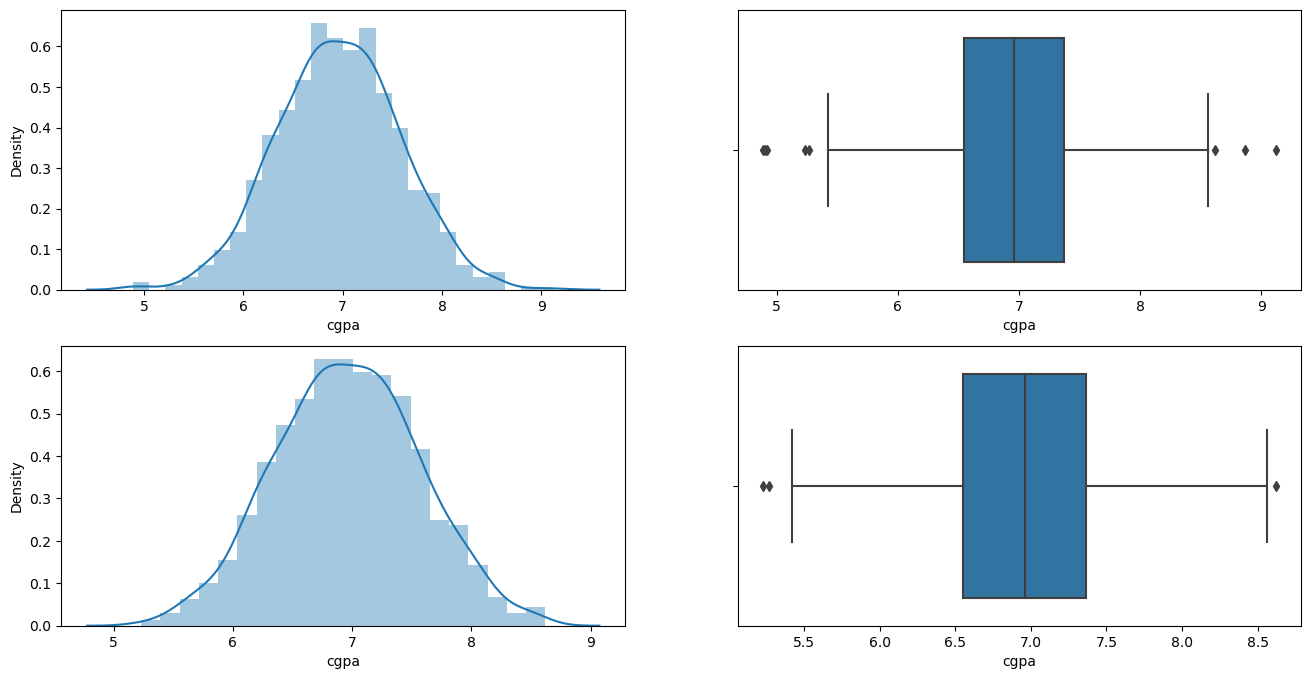

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df1['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['cgpa'])

In [27]:
df2=df.copy()
df2['cgpa'] = np.where(
    df2['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df2['cgpa']<lower_limit,
        lower_limit,
        df2['cgpa']
    )
)


<AxesSubplot:xlabel='cgpa'>

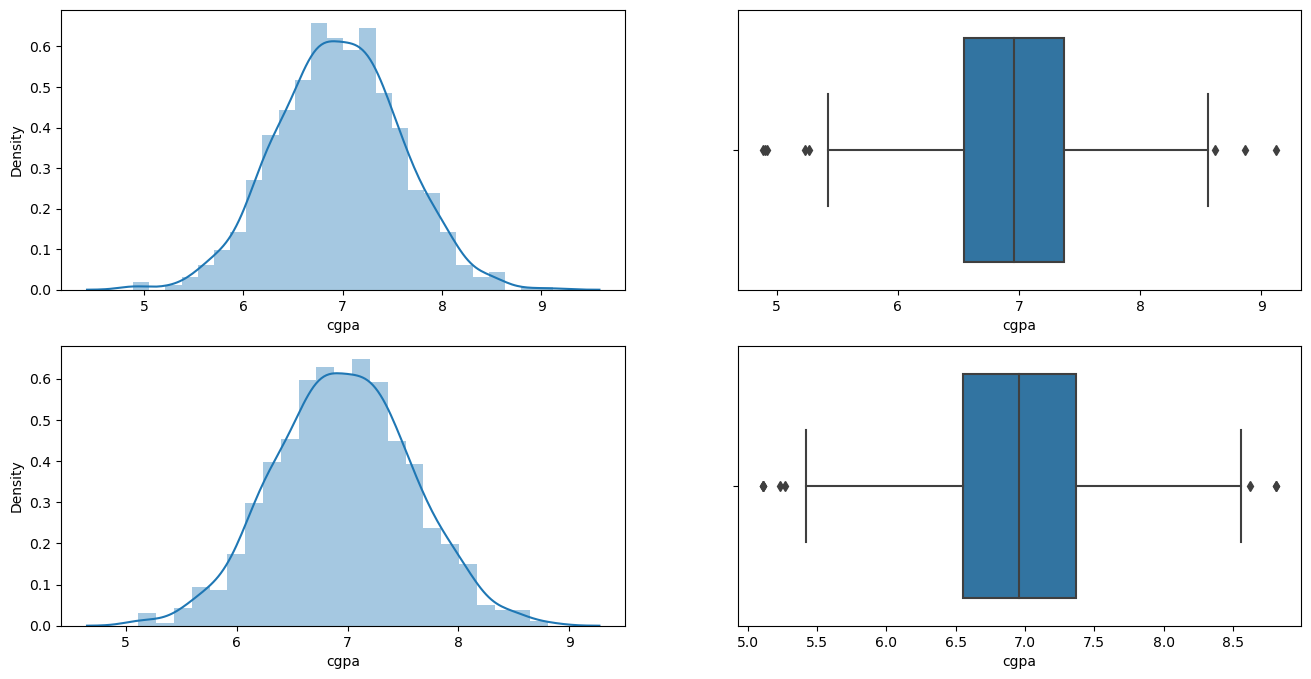

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(df2['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(df2['cgpa'])

In [29]:
df.shape

(1000, 4)

In [30]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64